# Lab 02 - Epic Robot Battles

In the following exercises, we will build robots and make them fight against each other!
We will first build a generic class robot, that we will improve step by step.


All robots in the battlefield are different. But, they have common attributes:
- a number of initial_health_points 
- a quantity of initial_energy

As these are set as rules of the game, we are going to define them as constants for the Lab.
One option is to define them as global variables, or we can use Enum.

In [1]:
from enum import IntEnum

class GameRules(IntEnum):
    INITIAL_HEALTH_POINTS = 1000
    INITIAL_ENERGY = 1000
    
GameRules.INITIAL_ENERGY

<GameRules.INITIAL_HEALTH_POINTS: 1000>

At each turn of a battle, each robot makes an action.

# Exercise 1: Build the Robot class

The first step is to build a simple robot class.

Robot will fight with each other. 
Basic robot have these charactersistics:
- they inflict 5 damages when they hit (force = 5)
- they have a 10% chance of failing at an attack (fail_percentage = 10)

Robot can do certain actions:
- attack: takes 1 of energy

Depending on the action of the opponent, they might decide on the action to take.

Once a battle is finished, we can reset the energy and health points to their initial values.

Finish this skeleton of the Robot class:


In [2]:
import random

class RobotPoints(IntEnum):
    FORCE = 5
    FAIL_PERCENTAGE = 10
    
class Robot:
    
    def __init__(self, name):
        
        self.name = name
        
        self.initial_energy = GameRules.INITIAL_ENERGY
        self.initial_health_points = GameRules.INITIAL_HEALTH_POINTS
        
        self.force = RobotPoints.FORCE
        self.fail_percentage = RobotPoints.FAIL_PERCENTAGE
        
        self.energy = self.initial_energy
        self.health_points = self.initial_health_points
    
    def decide_on_action(self, incoming_damage):
        # for now, robots will be very dumb and always attack.
        
        self.health_points -= incoming_damage
        
        attack_strenght = 0
        
        if self.energy > 0:
            attack_strenght = self.attack()
        
        return attack_strenght
        
    def attack(self):
        
        self.energy -= 1
        
        if random.randint(0, 99) < self.fail_percentage:
            return 0
        
        return self.force
    
    def reset(self):
        
        self.energy = self.initial_energy
        self.health_points = self.initial_health_points

# Exercise 2: Game engine

Now, we will build a Battle ring.
This is a Class, that takes as arguments two robots, and make them battle.
- selects randomly a robot which starts 
- iterate actions until the end

The robot performs actions until either:
- one robot has no health points left
- two robots don't have energy left

Then, proclaim a winner: the one with more health points left.

Complete the following class:

In [3]:
class Battle:
    
    def __init__(self, robot_1, robot_2):
        
        self.robot_1 = robot_1
        self.robot_2 = robot_2
        
        # select first robot 
        self.current_acting_robot = random.choice( [self.robot_1, self.robot_2] )
                
    def battle_ended(self):
        
        if self.robot_1.health_points <= 0:
            return True
        
        if self.robot_2.health_points <= 0:
            return True
        
        if self.robot_1.energy <= 0 and self.robot_2.energy <= 0:
            return True
        
        return False
    
    def find_winner(self):
        
        if self.robot_1.health_points > self.robot_2.health_points:
            
            return self.robot_1
            
        elif self.robot_1.health_points < self.robot_2.health_points:
            
            return self.robot_2

        else:
            
            return None
        

    def announce_winner(self):
        
        winner = self.find_winner()
        
        if winner is self.robot_1:
            loser = self.robot_2
        else:
            loser = self.robot_1
            
        print('  Winner is ', winner.name, ' by ', str(winner.health_points - loser.health_points))
        
        
    def battle_until_the_end(self):
        
        battle_ongoing = True
        
        #first action is initialized as an attack with 0 damage
        
        attack_points = 0
        
        while battle_ongoing:
            
            # inflict damages on the current robot
            # the current robot produces new_damages
            
            new_attack_points = self.current_acting_robot.decide_on_action(attack_points)
            
            # Change the current_acting_robot. If it was robot_1, then now it is robot_2
            if self.current_acting_robot is self.robot_1:
                self.current_acting_robot = self.robot_2
            else:
                self.current_acting_robot = self.robot_1
            
            # Check if battle ended
            if self.battle_ended() is True:
                battle_ongoing = False
                
            # Set the damage points sent by the previous robot.
            attack_points = new_attack_points
            
            
        winner = self.find_winner()
        
        return winner
        
            

In [4]:
# Now we can test it!

robot_1 = Robot('spock')
robot_2 = Robot('donald')

battleground = Battle(robot_1, robot_2)
winner = battleground.battle_until_the_end()
battleground.announce_winner()



  Winner is  donald  by  30


# Exercise 3: Inheritance

Create a class StrongBot(Robot):
- it accepts brutality as an argument, to increase the original strength by the number of brutality point
- any additional brutality point increases the energy required to attack by 0.5 points
- make it compete with a classic Robot, and verify that it kicks its bolts.

Create a class CleverBot(Robot):
- it can choose to either attack or dodge
- it can dodge with a probbility of 3/10. dodging takes two energy point 
- it accepts an additional argument named intelligence. For each intelligence point, it raises the dodging probability (3/10, 4/10, 5/10)
- when attacked, it dodges, else it attacks

Make StrongBot and CleverBot fight. Who wins, depending on the intelligence and brutality?

Here, it can be interesting to check matplotlib Gallery to see how you can plot this result.

In [5]:
class StrongBot(Robot):
    
    def __init__(self, name, brutality):
        
        super().__init__(name)
        
        self.brutality = brutality
        self.force += brutality
        
    def attack(self):
        
        attack_strenght = super().attack()
        self.energy -= self.brutality/2.0
        
        return attack_strenght
        
        

In [9]:
class CleverBot(Robot):
    
    def __init__(self, name, intelligence):
        
        super().__init__(name)
        
        self.intelligence = intelligence
        
        self.dodge_percentage = 30 + 10*intelligence
        if self.dodge_percentage > 100: 
            self.dodge_percentage = 100
        
    def dodge(self):
        
        self.energy -= 2
        
        if random.randint(0, 99) < self.dodge_percentage:
            return True
        else:
            return False
    
    def decide_on_action(self, incoming_damage):
        
        attack_strenght = 0
        
        if self.energy > 0:
            
            if incoming_damage > 0:
                dodge_succsful = self.dodge()
                if not dodge_succsful:
                    self.health_points -= incoming_damage

            else:
                attack_strenght = self.attack()
                
        return attack_strenght
                

In [10]:
# Now we can test it!

robot_1 = StrongBot('goliath', brutality = 2)
robot_2 = CleverBot('david', intelligence = 5)

times_david_wins = 0.0

# We do 1000 battles to see the frequency at which david wins against goliath.
for i in range(1000):

    battleground = Battle(robot_1, robot_2)
    winner = battleground.battle_until_the_end()
    
    if winner is robot_2:
        times_david_wins += 1.0
        
    robot_1.reset()
    robot_2.reset()
    
percentage_win_by_david = 100*times_david_wins/1000
print( percentage_win_by_david )



2.0


# For fun

Let's do a systematic evaluation of who wins, between clever and strong robots.

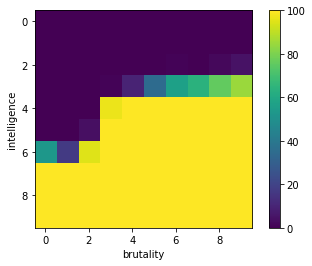

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_intelligence_vs_brutality(intelligence, brutality):
    robot_1 = StrongBot('strong', brutality = brutality)
    robot_2 = CleverBot('clever', intelligence = intelligence)

    times_rob_2_wins = 0.0

    for i in range(100):

        battleground = Battle(robot_1, robot_2)
        winner = battleground.battle_until_the_end()

        if winner is robot_2:
            times_rob_2_wins += 1.0

        robot_1.reset()
        robot_2.reset()

    return times_rob_2_wins

result = np.zeros( (10, 10))

for intel in range(10):
    for brutal in range(10):
        result[intel, brutal] = evaluate_intelligence_vs_brutality(intel, brutal)

plt.ylabel('intelligence')
plt.xlabel('brutality')

plt.imshow(result)
plt.colorbar()

# The plot shows the probability of winning (in percentage) for a clever agent against a strong agent.